In [2]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

In [3]:
grid_points = 1000

In [4]:
def posterior_grid_approx(success, tosses, prior):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

Problem 1:

In [28]:
prior = np.repeat(1, grid_points)
p_grid, posterior = posterior_grid_approx(success=4, tosses=15, prior=prior)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

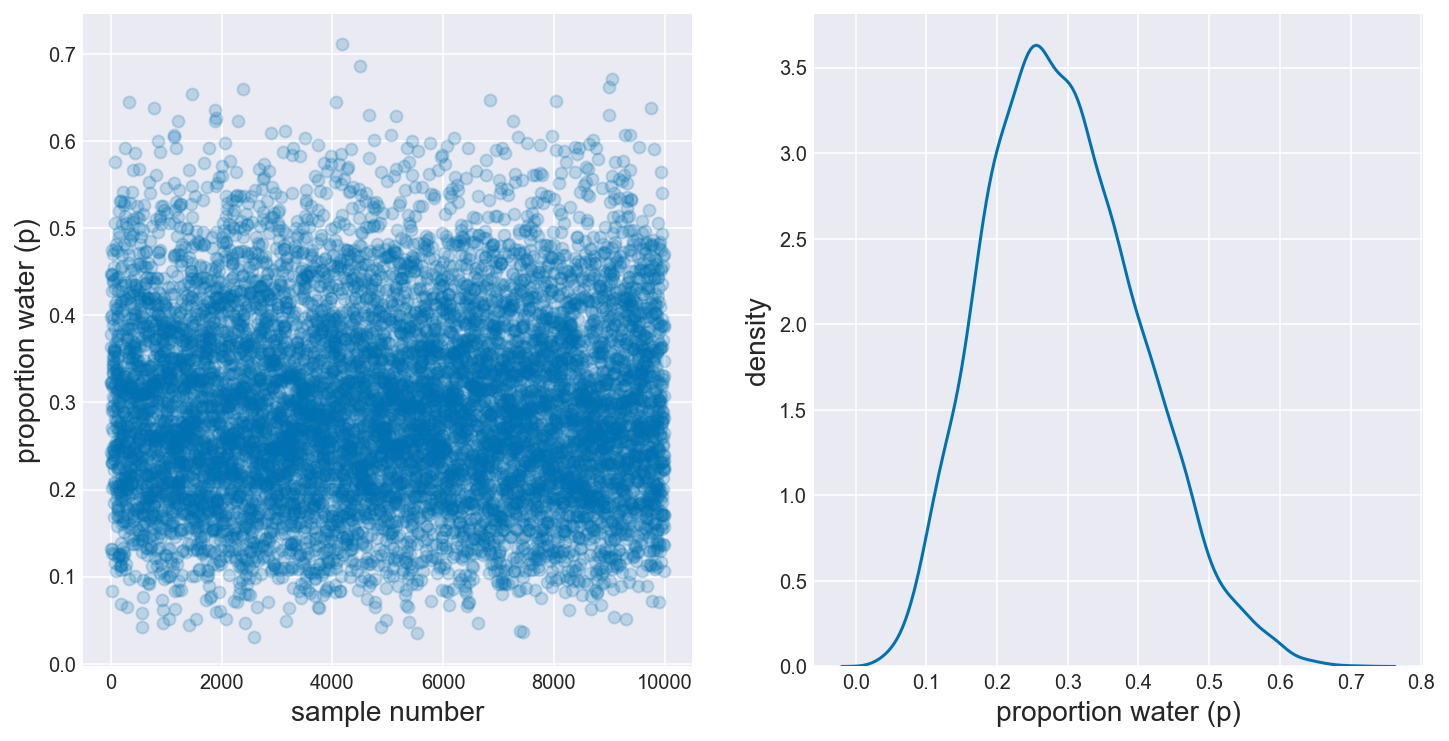

In [29]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

In [30]:
np.mean(samples)

0.29419419419419424

In [31]:
np.percentile(samples, [0.5, 99.5])

array([0.07507508, 0.59259259])

Problem 2:

In [32]:
prior = np.append(np.repeat(0, grid_points/2), np.repeat(2, grid_points/2))
p_grid, posterior = posterior_grid_approx(success=4, tosses=6, prior=prior)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

In [27]:
np.mean(samples)

0.2925278278278278

In [77]:
PI = np.percentile(samples, [5.5, 94.5])
PI

array([0.52552553, 0.87687688])

In [95]:
HDI = pm.stats.hdi(samples, hdi_prob = 0.89)
HDI

array([0.5005005 , 0.83983984])

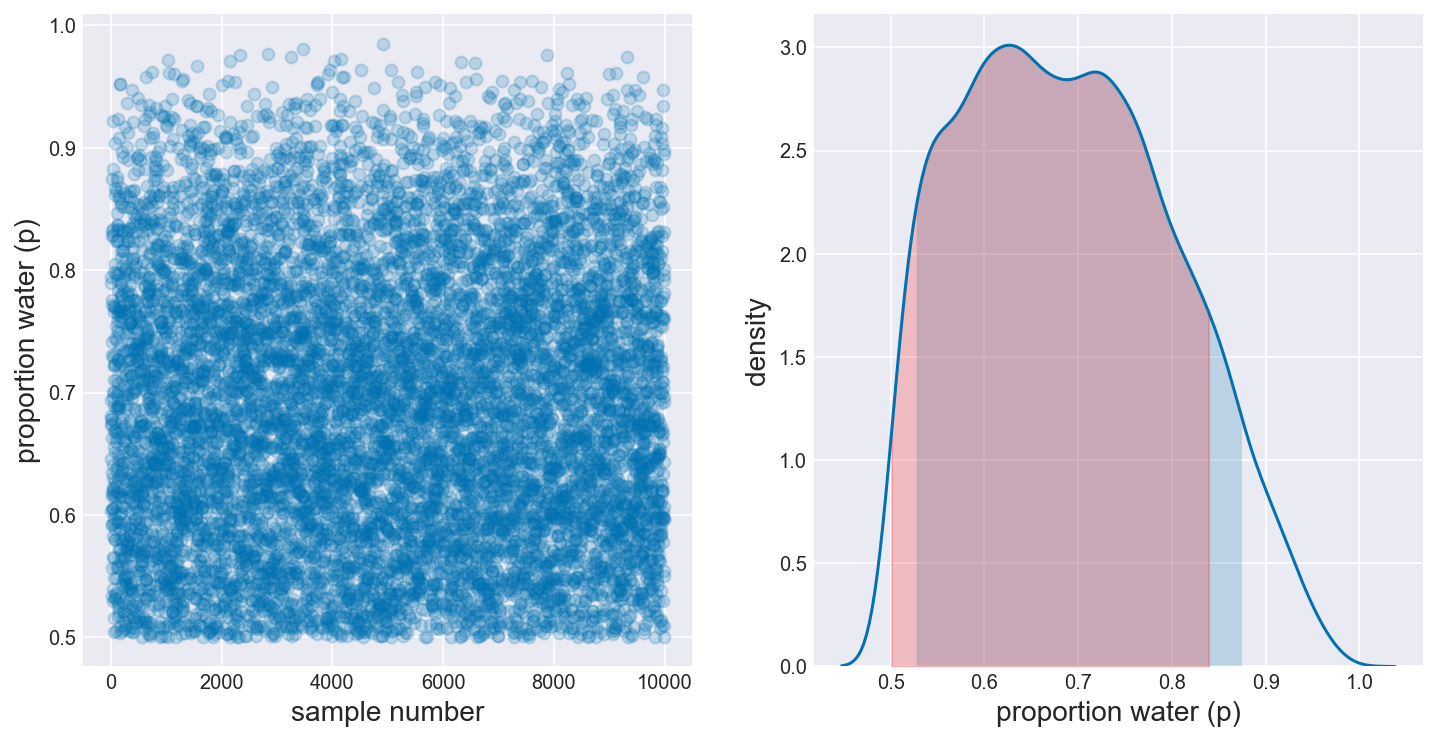

In [88]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
x = ax1.lines[-1].get_xdata()
y = ax1.lines[-1].get_ydata()
ax1.fill_between(x, 0, y, where = (x>PI[0]) & (x<PI[1]), alpha = 0.2)
ax1.fill_between(x, 0, y, where = (x>HDI[0]) & (x<HDI[1]), alpha = 0.2, color = 'red')
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

In [94]:
print('HDI width: ' + str(np.max(HDI) - np.min(HDI)))
print('PI width: ' + str(np.max(PI) - np.min(PI)))

HDI width: 0.33933933933933924
PI width: 0.3513513513513513
